# Main Experiments
    refer mainRTain_test.py
    July 21 2025

In [2]:
import os
import numpy as np
import pandas as pd

from datetime import datetime

from datetime import datetime

from Core.models import CModels
from Core.dataset import CDataset
from Core.plots import CPlots

from mainRTrain_test import Run_RTrain, Run_RV
from Core.tSNE import tSNEPlots, Beth, Kyoto

# Configure Dataset

## <font color='red'> KYOTO </font>

### Configure

In [3]:
cDATA = 'Kyoto'

objDS = CDataset()

strFileName =  r'../DATA/Kyoto2015DS.csv'
#strPath = os.path.join(strRoot, strFileName)
listData, listLabel = objDS.GetKyotoDataset(strFileName)
print('Kyoto:', listData.shape, listLabel.shape)

fTestSize = 0.9
nRepeats = 10
nSteps = 5
listSelectedClassifier = [3, 4, 5]

CDataset Object Created
label
0    30000
1    30000
dtype: int64
Kyoto: (60000, 13) (60000, 1)


### Add synthetic data

In [4]:
strSynFileName = '../DATA/Kyoto_Syn_3000.csv'
dfSyn = pd.read_csv(strSynFileName, delimiter=',')
dfSyn['Label'] = 1
print(dfSyn.shape)

listSynLabel = dfSyn['Label'].to_numpy().reshape(-1,1)
print(listSynLabel.shape)

listSynData = dfSyn.drop('Label', axis=1)
print(listSynData.shape)

listData = np.vstack([listData, listSynData])
listLabel = np.vstack([listLabel, listSynLabel])
print('Kyoto:', listData.shape, listLabel.shape)

(3000, 14)
(3000, 1)
(3000, 13)
Kyoto: (63000, 13) (63000, 1)


### TSNE

CDataset Object Created
label
0    30000
1    30000
dtype: int64
Kyoto:  (60000, 13) (60000, 1)
Total: (60000, 13) Training: (6000, 13)
[0 1] [3082 2918]
[0 1] [26918 27082]
(6000, 14)
Data for tSNE (6000, 13)


c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.037s...
[t-SNE] Computed neighbors for 6000 samples in 0.394s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.033783
[t-SNE] KL divergence after 300 iterations: 1.299915


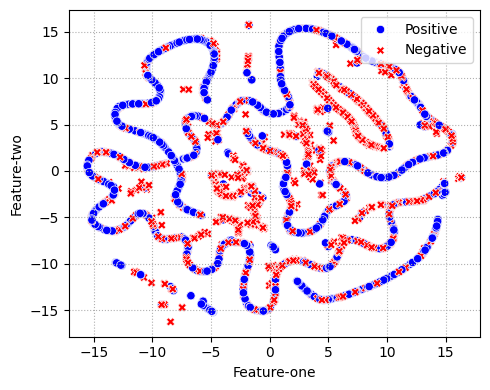

In [4]:
objDS = CDataset()
strFileName = r'../DATA/Kyoto2015DS.csv'
df = Kyoto(objDS, strFileName, True)

strOutputFile = './local-data/tsneKyoto_train.pdf'
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

#### All 60k Samples

In [ ]:
listDS = np.hstack((listData, listLabel))
print(listDS.shape)

# Here add header to the dataset and also add labels 
dfCols = ['Bin_'+str(i) for i in range(listData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=None)


## <font color='red'> BETH </font>

In [ ]:
objDS = CDataset()

strFileName = r'../DATA/Beth_16Aug2023.csv'
df = Beth(objDS, strFileName, nExp=1)
df = df.sample(frac=0.1)
print('Sampled: ', df['Labels'].value_counts())

strOutputFile = './local-data/tsneBeth_train.pdf'
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

## <font color='red'> MNIST </font>

In [ ]:
cDATA = 'Digit'

objDS = CDataset()
listData, listLabel = objDS.PrepareMNISTDS()
print(listData.shape, listLabel.reshape(-1, 1).shape)

strOutputFile = './local-data/tsneDigit_train.pdf'

listDS = np.hstack((listData, listLabel.reshape(-1, 1)))
print(listDS.shape)

dfCols = ['Bin_'+str(i) for i in range(listData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

# <font color='blue'>NEW RUN TEST</font>

## Set Output Path

In [5]:

# Generate output directory
strOutDir = datetime.now().strftime('%Y_%m_%d')
print(strOutDir)
strDirPath = os.path.join(os.getcwd(), 'local-data', cDATA + '_' + strOutDir)
if not os.path.isdir(strDirPath):
    os.makedirs(strDirPath)


2025_07_22


## Run_RTrain

Combination - D:  3 A:  3
CModels Object Created
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
0.05
trainSize =  0.05  repeats =  10
np.mean(tpr_aucDs) 0.964
np.mean(afr_aucDs) 0.701
0.1
trainSize =  0.1  repeats =  10
np.mean(tpr_aucDs) 0.969
np.mean(afr_aucDs) 0.715
0.15
trainSize =  0.15  repeats =  10
np.mean(tpr_aucDs) 0.972
np.mean(afr_aucDs) 0.584
0.2
trainSize =  0.2  repeats =  10
np.mean(tpr_aucDs) 0.974
np.mean(afr_aucDs) 0.682
0.25
trainSize =  0.25  repeats =  10
np.mean(tpr_aucDs) 0.975
np.mean(afr_aucDs) 0.697
0.3
trainSize =  0.3  repeats =  10
np.mean(tpr_aucDs) 0.974
np.mean(afr_aucDs) 0.586
0.35
trainSize =  0.35  repeats =  10
np.mean(tpr_aucDs) 0.975
np.mean(afr_aucDs) 0.67
0.4
trainSize =  0.4  repeats =  10
np.mean(tpr_aucDs) 0.976
np.mean(afr_aucDs) 0.613
0.45
trainSize =  0.45  repeats =  10
np.mean(tpr_aucDs) 0.976
np.mean(afr_aucDs) 0.57
0.5
trainSize =  0.5  repeats =  10
np.mean(tpr_aucDs) 0.975
np.mea

<Figure size 640x480 with 0 Axes>

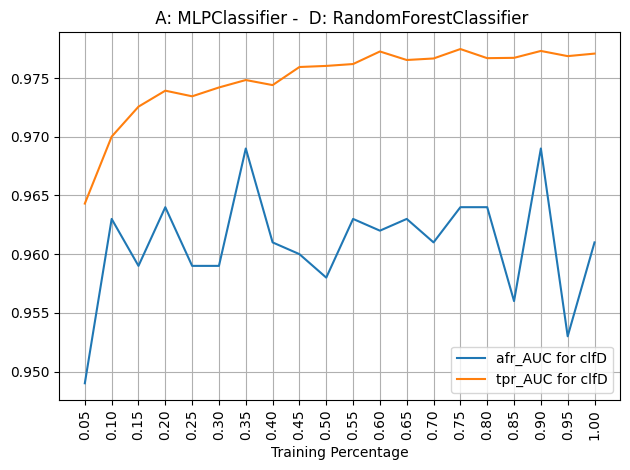

<Figure size 640x480 with 0 Axes>

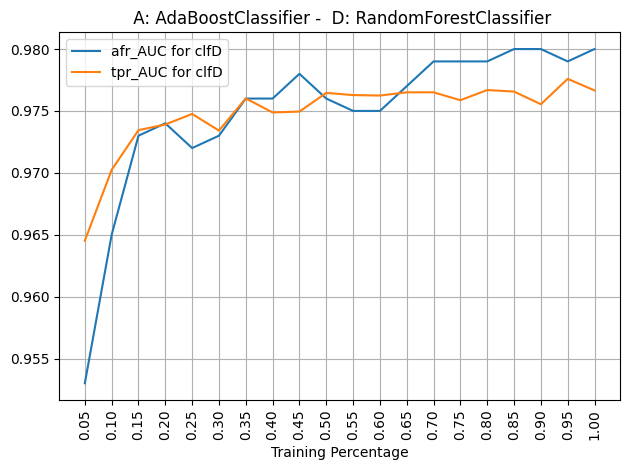

<Figure size 640x480 with 0 Axes>

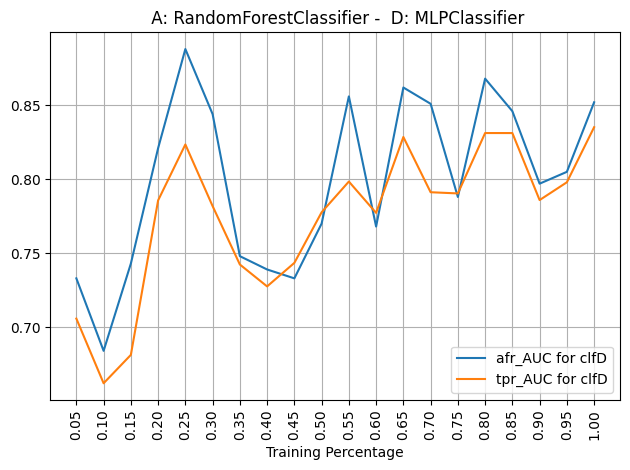

<Figure size 640x480 with 0 Axes>

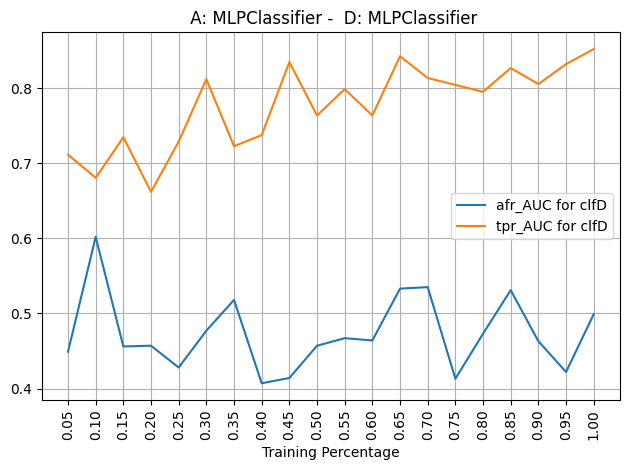

<Figure size 640x480 with 0 Axes>

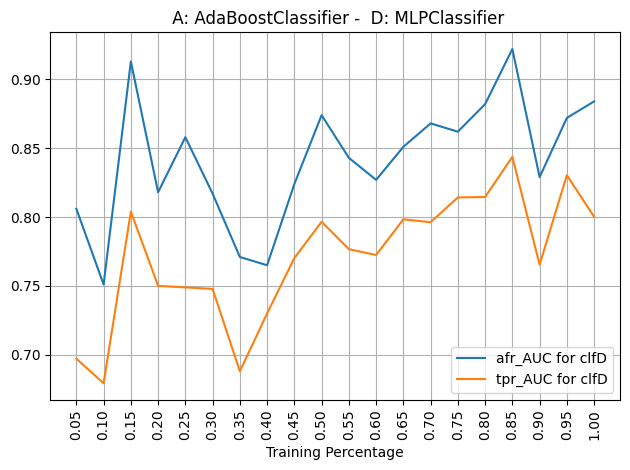

<Figure size 640x480 with 0 Axes>

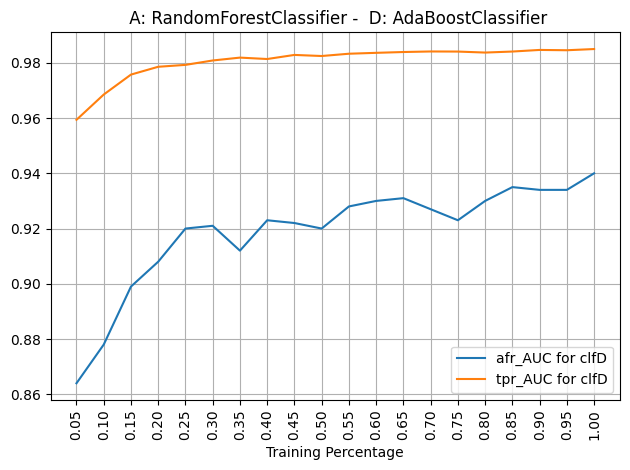

<Figure size 640x480 with 0 Axes>

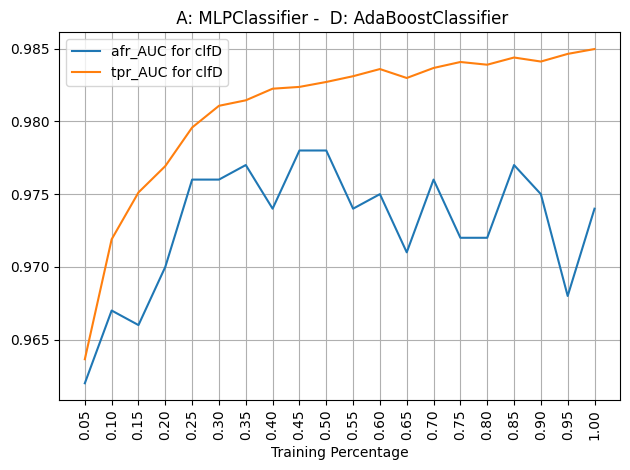

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

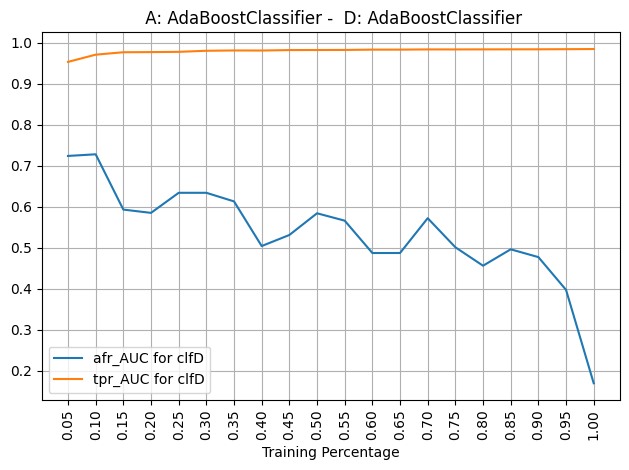

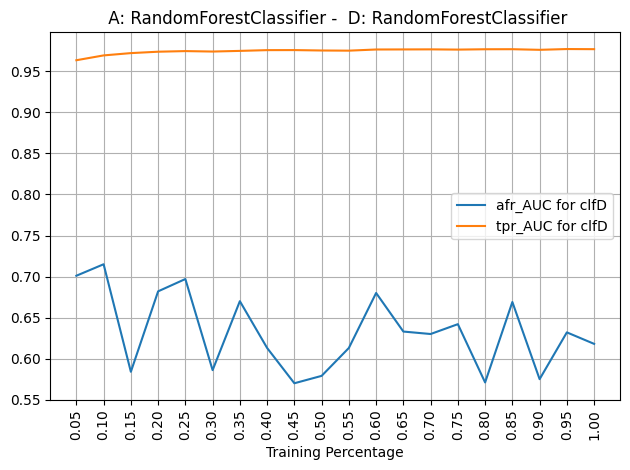

<Figure size 640x480 with 0 Axes>

In [6]:
Run_RTrain(strDirPath, fTestSize, listSelectedClassifier,
           listData, listLabel, nRepeats, nSteps)

## <font color='green'>Run_RV</font>

## Load previous results
    Set Local Path - If not a new run

In [1]:
strDirPath = r'./local-data/Kyoto_2025_07_22'

## If fresh run donot set the above path

In [5]:
Run_RV(strDirPath, fTestSize, listSelectedClassifier,
        listData, listLabel, nRepeats, nSteps)

CModels Object Created
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]
rw100 =  0  repeats =  10
np.mean(tpr_aucAs) 0.977
np.mean(tpr_aucRs) 0.977
np.mean(afr_aucRs) 0.152
rw100 =  5  repeats =  10
np.mean(tpr_aucAs) 0.976
np.mean(tpr_aucRs) 0.974
np.mean(afr_aucRs) 0.414
rw100 =  10  repeats =  10
np.mean(tpr_aucAs) 0.978
np.mean(tpr_aucRs) 0.973
np.mean(afr_aucRs) 0.494
rw100 =  15  repeats =  10
np.mean(tpr_aucAs) 0.977
np.mean(tpr_aucRs) 0.97
np.mean(afr_aucRs) 0.53
rw100 =  20  repeats =  10
np.mean(tpr_aucAs) 0.978
np.mean(tpr_aucRs) 0.97
np.mean(afr_aucRs) 0.512
rw100 =  25  repeats =  10
np.mean(tpr_aucAs) 0.977
np.mean(tpr_aucRs) 0.967
np.mean(afr_aucRs) 0.545
rw100 =  30  repeats =  10
np.mean(tpr_aucAs) 0.977
np.mean(tpr_aucRs) 0.963
np.mean(afr_aucRs) 0.561
rw100 =  35  repeats =  10
np.mean(tpr_aucAs) 0.977
np.mean(tpr_aucRs) 0.963
np.mean(afr_aucRs) 0.565
rw100 =  40  repeats =  10
np.mean(tpr_aucAs) 0.978
np.mean(tpr_aucRs) 0.956
np

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>